In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
from scipy import stats
import statsmodels.api as sm

In [2]:
diabetes = pd.read_csv("data/diabetes.csv")
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# rename column 'Outcome' to 'Diabetes' as it's not the outcome for this report
diabetes = diabetes.rename(columns={'Outcome': 'Diabetes'})

In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.info()
# all columns have 768 non-null count, indicating no null value in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age    Diabetes  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
# it is not possible for 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' to have a min 0, indicating that missing value in this dataset is being encoded as '0'
# replace '0' in these columns with NaN
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
diabetes.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   
5            5    116.0           74.0            NaN      NaN  25.6   
6            3     78.0           50.0           32.0     88.0  31.0   
7           10    115.0            NaN            NaN      NaN  35.3   
8            2    197.0           70.0           45.0    543.0  30.5   
9            8    125.0           96.0            NaN      NaN   NaN   

   DiabetesPedigreeFunction  Age  Diabetes  
0                     0.627   50         1  
1                     0.351   31         0  
2                     0.672   32         1  
3                     0.167   21         0  
4                     2.288   33         1  
5                     0.201   30         0  
6                     0.248   26         1  
7                     0.134   29         0  
8                     0.158   53         1  
9                     0.232   54         1

In [8]:
# check number of actual missing data
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Diabetes                      0
dtype: int64

In [9]:
# columns 'SkinThickness' and 'Insulin' have a large percentage of missing data
# percentage of missing data for column 'SkinThickness'
227/768

0.2955729166666667

In [10]:
# percentage of missing data for column 'Insulin'
374/768

0.4869791666666667

In [11]:
# check the mean and medium (50%) for each of these columns ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI')
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age    Diabetes  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [12]:
# use median of all known values of the columns ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI') to replace the missing data
for i in diabetes.columns[diabetes.isnull().any(axis=0)]:
    diabetes[i].fillna(diabetes[i].median(), inplace=True)
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age    Diabetes  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [13]:
# covert continuous variables to categorical variables
preg_gp = pd.cut(diabetes.Pregnancies, bins=[0, 2, 5, 17], labels= ['0-2', '3-5', '6 or more'], include_lowest=True)
diabetes.insert(1, 'PregGp', preg_gp)

In [14]:
BMI_gp = pd.cut(diabetes.BMI, bins=[0, 18.5, 24.9, 29.9, 67.1], labels= ['Underweight', 'Normal weight', 'Overweight', 'Obese'], include_lowest=True)
diabetes.insert(7, 'BMIGp', BMI_gp)

In [15]:
Age_gp = pd.cut(diabetes.Age, bins=[17, 24, 44, 64, 81], labels= ['18-24', '25-44', '45-64', '65 years and over'], include_lowest=True)
diabetes.insert(10, 'AgeGp', Age_gp)

In [16]:
Diabetes_gp = diabetes.Diabetes.astype('category')
diabetes.insert(12, 'DiabetesGp', Diabetes_gp)

In [17]:
Glucose_gp = pd.cut(diabetes.Glucose, bins=[0, 140, 200], labels= ['Normal', 'Abnormal'], include_lowest=True)
diabetes.insert(3, 'GlucoseGp', Glucose_gp)

In [18]:
diabetes.head()

Pregnancies     PregGp  Glucose GlucoseGp  BloodPressure  SkinThickness  \
0            6  6 or more    148.0  Abnormal           72.0           35.0   
1            1        0-2     85.0    Normal           66.0           29.0   
2            8  6 or more    183.0  Abnormal           64.0           29.0   
3            1        0-2     89.0    Normal           66.0           23.0   
4            0        0-2    137.0    Normal           40.0           35.0   

   Insulin   BMI          BMIGp  DiabetesPedigreeFunction  Age  AgeGp  \
0    125.0  33.6          Obese                     0.627   50  45-64   
1    125.0  26.6     Overweight                     0.351   31  25-44   
2    125.0  23.3  Normal weight                     0.672   32  25-44   
3     94.0  28.1     Overweight                     0.167   21  18-24   
4    168.0  43.1          Obese                     2.288   33  25-44   

   Diabetes DiabetesGp  
0         1          1  
1         0          0  
2         1          1  
3         0          0  
4         1          1

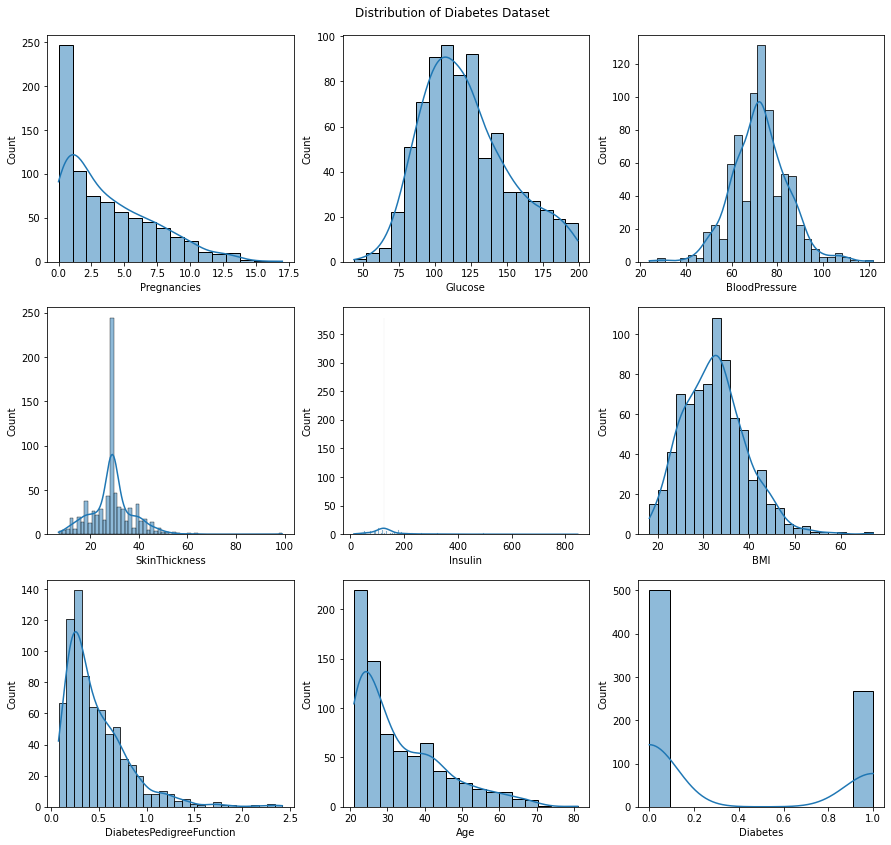

In [19]:
# visualization
# plot distribution for each variables

fig, axs = plt.subplots(3, 3, figsize=(15,13))

sns.histplot(data=diabetes, x='Pregnancies', kde=True, ax=axs[0,0])
sns.histplot(data=diabetes, x='Glucose', kde=True, ax=axs[0,1])
sns.histplot(data=diabetes, x='BloodPressure', kde=True, ax=axs[0,2])
sns.histplot(data=diabetes, x='SkinThickness', kde=True, ax=axs[1,0])
sns.histplot(data=diabetes, x='Insulin', kde=True, ax=axs[1,1])
sns.histplot(data=diabetes, x='BMI', kde=True, ax=axs[1,2])
sns.histplot(data=diabetes, x='DiabetesPedigreeFunction', kde=True, ax=axs[2,0])
sns.histplot(data=diabetes, x='Age', kde=True, ax=axs[2,1])
sns.histplot(data=diabetes, x='Diabetes', kde=True, ax=axs[2,2])
fig.subplots_adjust(top=0.95)
fig.suptitle('Distribution of Diabetes Dataset')
plt.show()

Text(0.5, 0.98, 'Distribution of Diabetes Dataset')

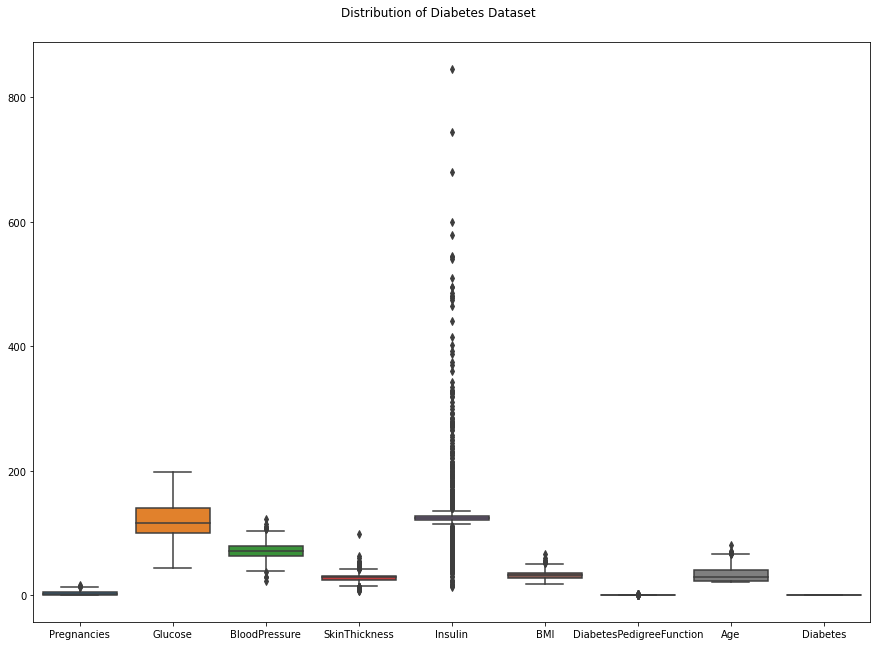

In [20]:
# boxplot of data distribution
fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(data=diabetes)
fig.subplots_adjust(top=0.93)
fig.suptitle('Distribution of Diabetes Dataset')

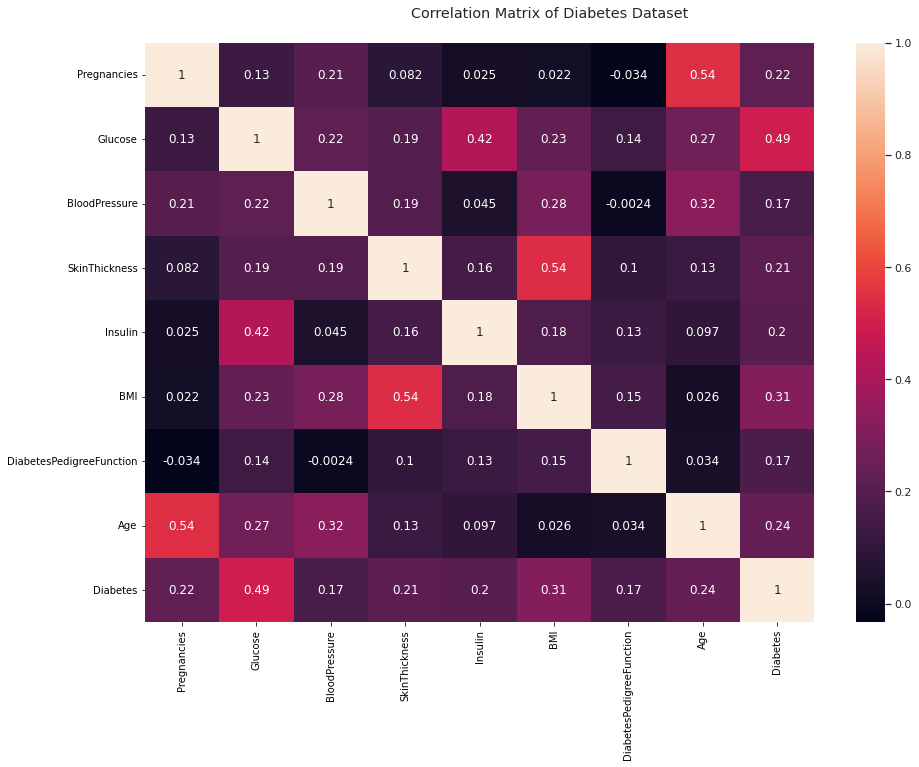

In [21]:
# correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(diabetes.corr(), annot=True)
fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Matrix of Diabetes Dataset')

plt.show()

In [22]:
pip install pingouin

Processing ./.cache/pip/wheels/8e/f4/3f/2629f2a31641ee865256bd1a03e0f3c66cea7ba4fa30ca7f9e/pingouin-0.5.1-py3-none-any.whl
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached xarray-2022.3.0-py3-none-any.whl (870 kB)
Processing ./.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a/littleutils-0.2.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install bioinfokit

Processing ./.cache/pip/wheels/40/b8/82/23dd1b441e2c834181d4c595cff79f091212eb2c482e0550e2/bioinfokit-2.0.8-py3-none-any.whl
  Using cached textwrap3-0.9.2-py2.py3-none-any.whl (12 kB)
Processing ./.cache/pip/wheels/fb/24/13/4c7b7f4121843c2fc7c5d6b4b1e3ab57be33428997761f996f/matplotlib_venn-0.11.7-py3-none-any.whl
Processing ./.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63/adjustText-0.7.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


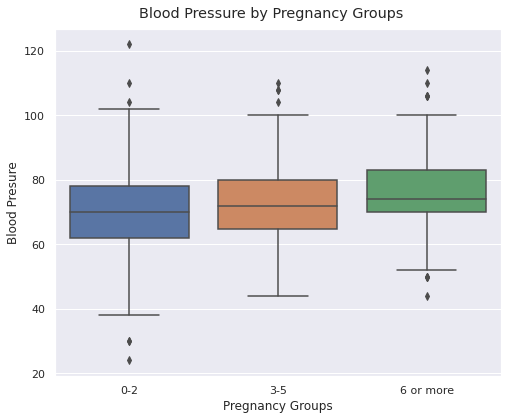

In [24]:
# Pregnencies and Blood Pressure
# Visualization
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='PregGp', y='BloodPressure', data=diabetes)
plt.xlabel('Pregnancy Groups')
plt.ylabel('Blood Presure')
fig.subplots_adjust(top=0.93)
fig.suptitle('Blood Pressure by Pregnancy Groups')
plt.show()

In [25]:
# independent t-test for Pregnencies and Blood Pressure
tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['PregGp'] == '0-2'],
                                diabetes['BloodPressure'][diabetes['PregGp'] == '3-5'])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:0.012472459763998427 T-Statistic:-2.5067834725695017


In [26]:
# independent t-test for Pregnencies and Blood Pressure
tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['PregGp'] == '3-5'],
                                diabetes['BloodPressure'][diabetes['PregGp'] == '6 or more'])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:0.0023898978160356156 T-Statistic:-3.055662477005636


In [27]:
# independent t-test for Pregnencies and Blood Pressure
tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['PregGp'] == '0-2'],
                                diabetes['BloodPressure'][diabetes['PregGp'] == '6 or more'])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:9.996403769687116e-09 T-Statistic:-5.8175668764146335


In [28]:
# 1 way ANOVA for Pregnencies and Blood Pressure
import pingouin as pg
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=diabetes, res_var='BloodPressure', anova_model='BloodPressure ~ C(PregGp)')
res.anova_summary

df         sum_sq      mean_sq          F        PR(>F)
C(PregGp)    2.0    4924.748772  2462.374386  17.554068  3.516628e-08
Residual   765.0  107309.395759   140.273720        NaN           NaN

In [29]:
# post hoc test
pt = pg.pairwise_tukey(dv='BloodPressure', between='PregGp', effsize='cohen', data=diabetes)
print(pt)

     A          B    mean(A)  mean(B)      diff        se         T  \
0  0-2        3-5  69.962751    72.66 -2.697249  1.050380 -2.567878   
1  0-2  6 or more  69.962751    76.00 -6.037249  1.021004 -5.913050   
2  3-5  6 or more  72.660000    76.00 -3.340000  1.158399 -2.883290   

        p-tukey     cohen  
0  2.808130e-02 -0.227737  
1  1.516810e-08 -0.509743  
2  1.126907e-02 -0.282006  


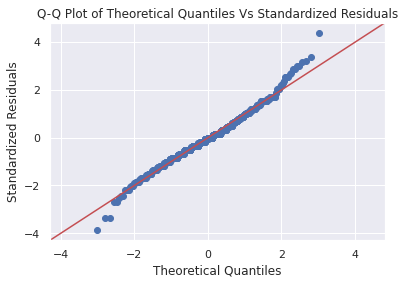

In [30]:
# test for normality
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.title('Q-Q Plot of Theoretical Quantiles Vs Standardized Residuals')
plt.show()

In [31]:
# test of homogeneity of variance
# bartlett (population of each subgroups will be equal)
res = stat()
res.bartlett(df=diabetes, res_var='BloodPressure', xfac_var='PregGp')
res.bartlett_summary
#variance are statistically not different from each other

Parameter   Value
0      Test statistics (T)  5.5172
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0634

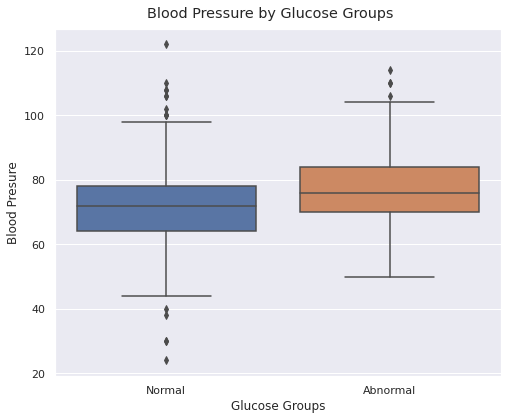

In [32]:
# Glucose and Blood Pressure
# Visualization
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(x='GlucoseGp', y='BloodPressure', data=diabetes)
plt.xlabel('Glucose Groups')
plt.ylabel('Blood Presure')
fig.subplots_adjust(top=0.93)
fig.suptitle('Blood Pressure by Glucose Groups')
plt.show()

In [33]:
# independent t-test for Glucose and Blood Pressure
tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['GlucoseGp'] == 'Normal'],
                                diabetes['BloodPressure'][diabetes['GlucoseGp'] == 'Abnormal'])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:3.5305636872351163e-07 T-Statistic:-5.137782643538554


In [34]:
#1 way ANOVA for Glucose and Blood Pressure

res = stat()
res.anova_stat(df=diabetes, res_var='BloodPressure', anova_model='BloodPressure ~ C(GlucoseGp)')
res.anova_summary

df         sum_sq      mean_sq         F        PR(>F)
C(GlucoseGp)    1.0    3738.812934  3738.812934  26.39681  3.530564e-07
Residual      766.0  108495.331597   141.638814       NaN           NaN

In [35]:
# 1 way ANOVA for Glucose and Blood Pressure (with effect size)
aov = pg. anova(data = diabetes, dv = 'BloodPressure', between='GlucoseGp', effsize='np2')
print(aov)

      Source  ddof1  ddof2         F         p-unc       np2
0  GlucoseGp      1    766  26.39681  3.530564e-07  0.033313


In [36]:
# post hoc test
pt = pg.pairwise_tukey(dv='BloodPressure', between='GlucoseGp', effsize='cohen', data=diabetes)
print(pt)

        A         B    mean(A)    mean(B)      diff        se         T  \
0  Normal  Abnormal  71.112847  76.208333 -5.095486  0.991768 -5.137783   

        p-tukey     cohen  
0  3.530562e-07 -0.428149  


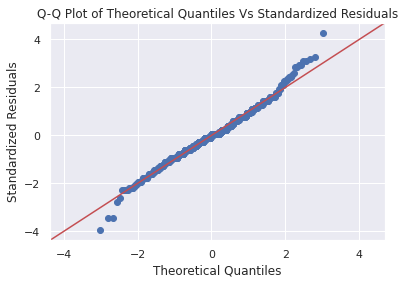

In [37]:
# test for normality
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('Q-Q Plot of Theoretical Quantiles Vs Standardized Residuals')
plt.show()

In [38]:
# test of homogeneity of variance
# bartlett (population of each subgroups will be equal)
res = stat()
res.bartlett(df=diabetes, res_var='BloodPressure', xfac_var='GlucoseGp')
res.bartlett_summary
#variance are statistically not different from each other

Parameter   Value
0      Test statistics (T)  0.6890
1  Degrees of freedom (Df)  1.0000
2                  p value  0.4065

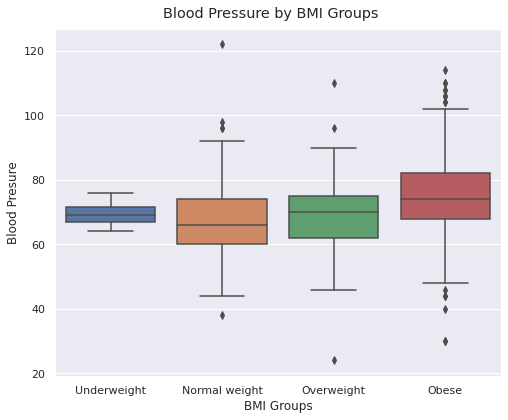

In [39]:
# BMI and Blood Pressure
# Visualization
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(x='BMIGp', y='BloodPressure', data=diabetes)
plt.xlabel('BMI Groups')
plt.ylabel('Blood Presure')
fig.subplots_adjust(top=0.93)
fig.suptitle('Blood Pressure by BMI Groups')

plt.show()

In [40]:
# independent t-test for BMI and Blood Pressure

tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['BMIGp'] == 'Normal weight'],
                                diabetes['BloodPressure'][diabetes['BMIGp'] == 'Overweight'])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:0.33297793877992143 T-Statistic:-0.9698165240468065


In [41]:
# independent t-test for BMI and Blood Pressure

tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['BMIGp'] == 'Normal weight'],
                                diabetes['BloodPressure'][diabetes['BMIGp'] == 'Obese'])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:2.458238220507651e-06 T-Statistic:-4.75884417887529


In [42]:
# independent t-test for BMI and Blood Pressure
tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['BMIGp'] == 'Overweight'],
                                diabetes['BloodPressure'][diabetes['BMIGp'] == 'Obese'])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:2.8761094659172268e-06 T-Statistic:-4.720370633805678


In [43]:
#1 way ANOVA for BMI and Blood Pressure

res = stat()
res.anova_stat(df=diabetes, res_var='BloodPressure', anova_model='BloodPressure ~ C(BMIGp)')
res.anova_summary

df         sum_sq      mean_sq          F        PR(>F)
C(BMIGp)    3.0    5243.640673  1747.880224  12.481299  5.648510e-08
Residual  764.0  106990.503858   140.039927        NaN           NaN

In [44]:
# 1 way ANOVA for BMI and Blood Pressure (with effect size)
aov = pg. anova(data = diabetes, dv = 'BloodPressure', between='BMIGp', effsize='np2')
print(aov)

  Source  ddof1  ddof2          F         p-unc       np2
0  BMIGp      3    764  12.481299  5.648510e-08  0.046721


In [45]:
# post hoc test

pt = pg.pairwise_tukey(dv='BloodPressure', between='BMIGp', effsize='cohen', data=diabetes)
print(pt)

               A              B    mean(A)    mean(B)      diff        se  \
0    Underweight  Normal weight  69.500000  68.117647  1.382353  6.031826   
1    Underweight     Overweight  69.500000  69.536313 -0.036313  5.982669   
2    Underweight          Obese  69.500000  74.368530 -4.868530  5.941374   
3  Normal weight     Overweight  68.117647  69.536313 -1.418666  1.468089   
4  Normal weight          Obese  68.117647  74.368530 -6.250883  1.289526   
5     Overweight          Obese  69.536313  74.368530 -4.832217  1.035511   

          T   p-tukey     cohen  
0  0.229177  0.995757  0.116813  
1 -0.006070  1.000000 -0.003069  
2 -0.819428  0.845296 -0.411407  
3 -0.966335  0.768647 -0.119882  
4 -4.847426  0.000009 -0.528221  
5 -4.666503  0.000021 -0.408339  


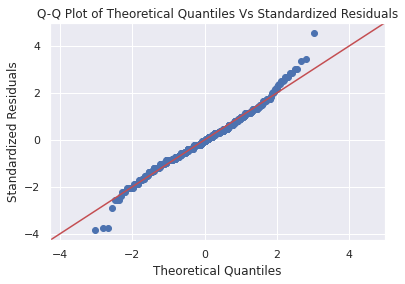

In [46]:
# test for normality
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('Q-Q Plot of Theoretical Quantiles Vs Standardized Residuals')
plt.show()

In [47]:
# test of homogeneity of variance
# bartlett (population of each subgroups will be equal)
res = stat()
res.bartlett(df=diabetes, res_var='BloodPressure', xfac_var='BMIGp')
res.bartlett_summary
#variance are statistically not different from each other

Parameter   Value
0      Test statistics (T)  5.0283
1  Degrees of freedom (Df)  3.0000
2                  p value  0.1697

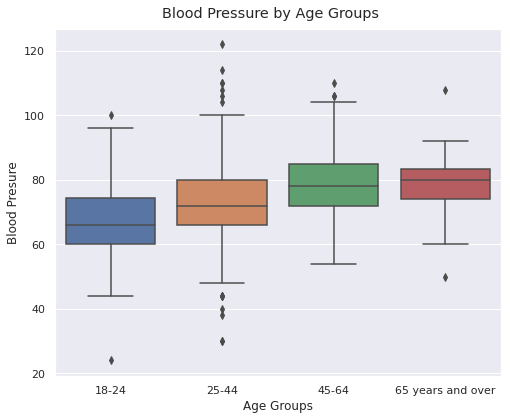

In [48]:
# Age and Blood Pressure
# Visualization
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(x='AgeGp', y='BloodPressure', data=diabetes)
plt.xlabel('Age Groups')
plt.ylabel('Blood Presure')
fig.subplots_adjust(top=0.93)
fig.suptitle('Blood Pressure by Age Groups')

plt.show()

In [49]:
# independent t-test for Age and Blood Pressure

tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['AgeGp'] == '18-24'],
                                diabetes['BloodPressure'][diabetes['AgeGp'] == '25-44'])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:4.4788205005604805e-07 T-Statistic:-5.100653505439296


In [50]:
# independent t-test for Age and Blood Pressure

tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['AgeGp'] == '18-24'],
                                diabetes['BloodPressure'][diabetes['AgeGp'] == '45-64'])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:3.0692830653010542e-18 T-Statistic:-9.235050488853465


In [51]:
# independent t-test for Age and Blood Pressure

tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['AgeGp'] == '25-44'],
                                diabetes['BloodPressure'][diabetes['AgeGp'] == '45-64'])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:4.7860793602884076e-08 T-Statistic:-5.539247460747874


In [52]:
# independent t-test for Age and Blood Pressure

tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['AgeGp'] == '45-64'],
                                diabetes['BloodPressure'][diabetes['AgeGp'] == '65 years and over'])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:0.9835181911153952 T-Statistic:-0.020697831883741143


In [53]:
#1 way ANOVA

res = stat()
res.anova_stat(df=diabetes, res_var='BloodPressure', anova_model='BloodPressure ~ C(AgeGp)')
res.anova_summary

df         sum_sq      mean_sq          F        PR(>F)
C(AgeGp)    3.0   11278.414527  3759.471509  28.450453  1.906536e-17
Residual  764.0  100955.730005   132.141008        NaN           NaN

In [54]:
# 1 way ANOVA for Age and Blood Pressure (with effect size)
aov = pg. anova(data = diabetes, dv = 'BloodPressure', between='AgeGp', effsize='np2')
print(aov)

  Source  ddof1  ddof2          F         p-unc      np2
0  AgeGp      3    764  28.450453  1.906536e-17  0.10049


In [55]:
# post hoc test
pt = pg.pairwise_tukey(dv='BloodPressure', between='AgeGp', effsize='cohen', data=diabetes)
print(pt)

       A                  B    mean(A)    mean(B)       diff        se  \
0  18-24              25-44  67.680365  72.646635  -4.966269  0.959703   
1  18-24              45-64  67.680365  79.316239 -11.635874  1.316356   
2  18-24  65 years and over  67.680365  79.375000 -11.694635  2.976944   
3  25-44              45-64  72.646635  79.316239  -6.669605  1.202937   
4  25-44  65 years and over  72.646635  79.375000  -6.728365  2.928559   
5  45-64  65 years and over  79.316239  79.375000  -0.058761  3.064021   

          T       p-tukey     cohen  
0 -5.174797  1.742446e-06 -0.432028  
1 -8.839456  1.985079e-13 -1.012232  
2 -3.928402  5.395696e-04 -1.017344  
3 -5.544435  2.431936e-07 -0.580205  
4 -2.297500  9.947936e-02 -0.585316  
5 -0.019178  9.999975e-01 -0.005112  


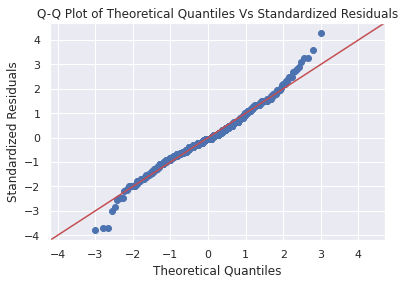

In [56]:
# qqplot for normality of residuals
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('Q-Q Plot of Theoretical Quantiles Vs Standardized Residuals')
plt.show()

In [57]:
# test of homogeneity of variance
# bartlett (population of each subgroups will be equal)
res = stat()
res.bartlett(df=diabetes, res_var='BloodPressure', xfac_var='AgeGp')
res.bartlett_summary
#variance are statistically not different from each other

Parameter   Value
0      Test statistics (T)  3.7691
1  Degrees of freedom (Df)  3.0000
2                  p value  0.2875

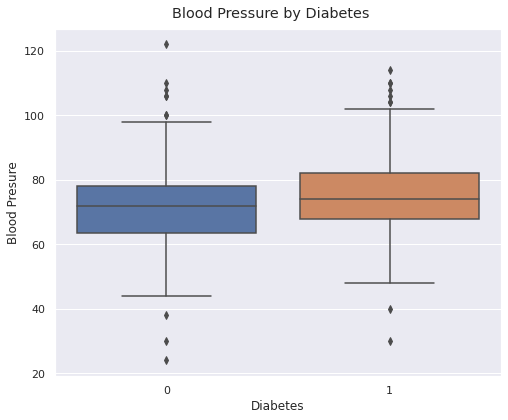

In [58]:
# Diabetes and Blood Pressure
# Visualization
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(x='DiabetesGp', y='BloodPressure', data=diabetes)
plt.xlabel('Diabetes')
plt.ylabel('Blood Presure')
fig.subplots_adjust(top=0.93)
fig.suptitle('Blood Pressure by Diabetes')
plt.show()

In [59]:
# independent t-test for Diabetes and Blood Pressure

tStat, pValue = stats.ttest_ind(diabetes['BloodPressure'][diabetes['Diabetes'] == 0],
                                diabetes['BloodPressure'][diabetes['Diabetes'] == 1])
print("P-Value:{0} T-Statistic:{1}".format(pValue, tStat))

P-Value:3.8908354906479115e-06 T-Statistic:-4.65097622072597


In [60]:
# 1 way ANOVA for Diabetes and Blood Pressure

res = stat()
res.anova_stat(df=diabetes, res_var='BloodPressure', anova_model='BloodPressure ~ C(DiabetesGp)')
res.anova_summary

df         sum_sq      mean_sq         F    PR(>F)
C(DiabetesGp)    1.0    3082.407964  3082.407964  21.63158  0.000004
Residual       766.0  109151.736567   142.495740       NaN       NaN

In [61]:
# 1 way ANOVA for Diabetes and Blood Pressure (with effect size)
aov = pg. anova(data = diabetes, dv = 'BloodPressure', between='DiabetesGp', effsize='np2')
print(aov)

       Source  ddof1  ddof2         F     p-unc       np2
0  DiabetesGp      1    766  21.63158  0.000004  0.027464


In [62]:
# post hoc test
pt = pg.pairwise_tukey(dv='BloodPressure', between='DiabetesGp', effsize='cohen', data=diabetes)
print(pt)

   A  B    mean(A)  mean(B)      diff       se         T   p-tukey     cohen
0  1  0  75.123134    70.92  4.203134  0.90371  4.650976  0.000004  0.352105


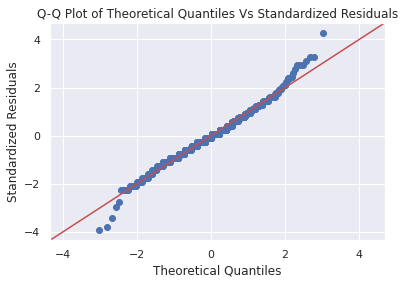

In [63]:
# qqplot for normality of residuals
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('Q-Q Plot of Theoretical Quantiles Vs Standardized Residuals')
plt.show()

In [64]:
# test of homogeneity of variance
# bartlett (population of each subgroups will be equal)
res = stat()
res.bartlett(df=diabetes, res_var='BloodPressure', xfac_var='DiabetesGp')
res.bartlett_summary
#variance are statistically not different from each other

Parameter   Value
0      Test statistics (T)  0.0012
1  Degrees of freedom (Df)  1.0000
2                  p value  0.9722

In [65]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 0.98, 'Blood Pressure by Age and Diabetes Groups')

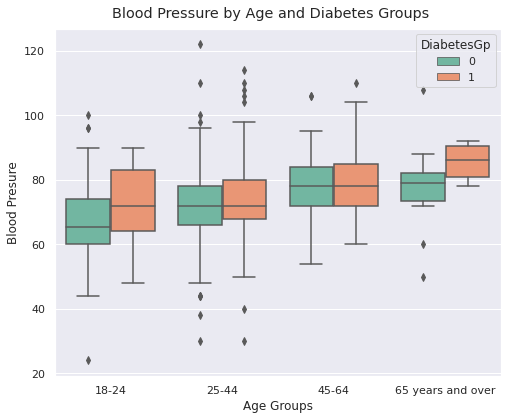

In [66]:
# 2 way ANOVA using Age and Diabetes as variables 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

# visualization
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='AgeGp', y='BloodPressure', hue='DiabetesGp', data=diabetes, palette='Set2')
plt.xlabel('Age Groups')
plt.ylabel('Blood Presure')
fig.subplots_adjust(top=0.93)
fig.suptitle('Blood Pressure by Age and Diabetes Groups')

In [67]:
res=stat()
res.anova_stat(df=diabetes, res_var='BloodPressure', anova_model='BloodPressure ~ C(AgeGp) + C(DiabetesGp) + C(AgeGp):C(DiabetesGp)')
res.anova_summary

df        sum_sq      mean_sq          F  \
C(AgeGp)                  3.0   9088.360903  3029.453634  23.083115   
C(DiabetesGp)             1.0    892.354340   892.354340   6.799351   
C(AgeGp):C(DiabetesGp)    3.0    320.131418   106.710473   0.813087   
Residual                760.0  99743.244246   131.241111        NaN   

                              PR(>F)  
C(AgeGp)                2.621674e-14  
C(DiabetesGp)           9.298027e-03  
C(AgeGp):C(DiabetesGp)  4.867923e-01  
Residual                         NaN

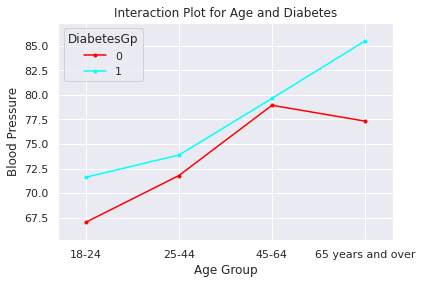

In [68]:
diabetes['AgeGp'] = diabetes.AgeGp.astype('object')
fig = interaction_plot(x=diabetes['AgeGp'], trace=diabetes['DiabetesGp'], response=diabetes['BloodPressure'])
plt.xlabel('Age Group')
plt.ylabel('Blood Pressure')
plt.title('Interaction Plot for Age and Diabetes')
plt.show()

In [69]:
# post-hoc test
res=stat()
res.tukey_hsd(df=diabetes,res_var='BloodPressure', xfac_var='AgeGp', anova_model='BloodPressure ~ C(AgeGp) + C(DiabetesGp) + C(AgeGp):C(DiabetesGp)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1             group2       Diff     Lower      Upper    q-value  \
0  45-64              25-44   6.669605  3.582897   9.756312   7.867851   
1  45-64              18-24  11.635874  8.258135  15.013613  12.543664   
2  45-64  65 years and over   0.058761 -7.803444   7.920966   0.027214   
3  25-44              18-24   4.966269  2.503694   7.428845   7.343315   
4  25-44  65 years and over   6.728365 -0.786249  14.242979   3.260276   
5  18-24  65 years and over  11.694635  4.055866  19.333403   5.574614   

    p-value  
0  0.001000  
1  0.001000  
2  0.900000  
3  0.001000  
4  0.097635  
5  0.001000

In [70]:
# post-hoc test
res=stat()
res.tukey_hsd(df=diabetes,res_var='BloodPressure', xfac_var='DiabetesGp', anova_model='BloodPressure ~ C(AgeGp) + C(DiabetesGp) + C(AgeGp):C(DiabetesGp)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1  group2      Diff    Lower     Upper  q-value  p-value
0       1       0  4.203134  2.50057  5.905698   6.8537    0.001

In [71]:
# post-hoc test
res=stat()
res.tukey_hsd(df=diabetes,res_var='BloodPressure', xfac_var=['AgeGp', 'DiabetesGp'], anova_model='BloodPressure ~ C(AgeGp) + C(DiabetesGp) + C(AgeGp):C(DiabetesGp)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


group1                  group2       Diff      Lower  \
0               (45-64, 1)              (45-64, 0)   0.699707  -5.749876   
1               (45-64, 1)              (25-44, 1)   5.767968   0.606183   
2               (45-64, 1)              (25-44, 0)   7.857406   2.907395   
3               (45-64, 1)              (18-24, 1)   8.032258   0.373107   
4               (45-64, 1)              (18-24, 0)  12.613246   7.513940   
5               (45-64, 1)  (65 years and over, 1)   5.854839 -12.107463   
6               (45-64, 1)  (65 years and over, 0)   2.311828  -8.669257   
7               (45-64, 0)              (25-44, 1)   5.068262  -0.329214   
8               (45-64, 0)              (25-44, 0)   7.157699   1.962382   
9               (45-64, 0)              (18-24, 1)   7.332551  -0.487379   
10              (45-64, 0)              (18-24, 0)  11.913540   6.575784   
11              (45-64, 0)  (65 years and over, 1)   6.554545 -11.476899   
12              (45-64, 0)  (65 years and over, 0)   1.612121  -9.481703   
13              (25-44, 1)              (25-44, 0)   2.089438  -1.380178   
14              (25-44, 1)              (18-24, 1)   2.264290  -4.532638   
15              (25-44, 1)              (18-24, 0)   6.845278   3.165801   
16              (25-44, 1)  (65 years and over, 1)  11.622807  -5.989118   
17              (25-44, 1)  (65 years and over, 0)   3.456140  -6.941929   
18              (25-44, 0)              (18-24, 1)   0.174852  -6.462678   
19              (25-44, 0)              (18-24, 0)   4.755840   1.379876   
20              (25-44, 0)  (65 years and over, 1)  13.712245  -3.838780   
21              (25-44, 0)  (65 years and over, 0)   5.545578  -4.749004   
22              (18-24, 1)              (18-24, 0)   4.580988  -2.168613   
23              (18-24, 1)  (65 years and over, 1)  13.887097  -4.611510   
24              (18-24, 1)  (65 years and over, 0)   5.720430  -6.117577   
25              (18-24, 0)  (65 years and over, 1)  18.468085   0.874370   
26              (18-24, 0)  (65 years and over, 0)  10.301418  -0.065777   
27  (65 years and over, 1)  (65 years and over, 0)   8.166667 -11.936072   

        Upper    q-value   p-value  
0    7.149289   0.466316  0.900000  
1   10.929753   4.803069  0.016407  
2   12.807417   6.822899  0.001000  
3   15.691409   4.507678  0.032120  
4   17.712553  10.631920  0.001000  
5   23.817140   1.401035  0.900000  
6   13.292913   0.904912  0.900000  
7   10.465737   4.036122  0.084049  
8   12.353017   5.921848  0.001000  
9   15.152482   4.030400  0.084949  
10  17.251296   9.593520  0.001000  
11  24.585990   1.562457  0.900000  
12  12.705946   0.624615  0.900000  
13   5.559054   2.588475  0.585450  
14   9.061217   1.431909  0.900000  
15  10.524755   7.996518  0.001000  
16  29.234732   2.836613  0.479805  
17  13.854210   1.428679  0.900000  
18   6.812382   0.113230  0.900000  
19   8.131804   6.055156  0.001000  
20  31.263270   3.358165  0.255293  
21  15.840161   2.315442  0.700514  
22  11.330590   2.917272  0.442849  
23  32.385704   3.226772  0.305152  
24  17.558438   2.077045  0.800984  
25  36.061800   4.511908  0.031822  
26  20.668614   4.271020  0.052896  
27  28.269405   1.746166  0.900000

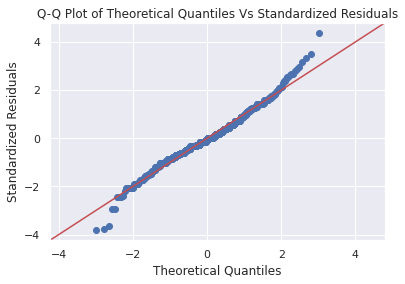

In [72]:
# test assumption of normality
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('Q-Q Plot of Theoretical Quantiles Vs Standardized Residuals')
plt.show()

In [73]:
# test assumption of homogeneity of variances
res = stat()
res.levene(df=diabetes, res_var='BloodPressure', xfac_var=['AgeGp', 'DiabetesGp'])
res.levene_summary

Parameter   Value
0      Test statistics (W)  0.4641
1  Degrees of freedom (Df)  7.0000
2                  p value  0.8607

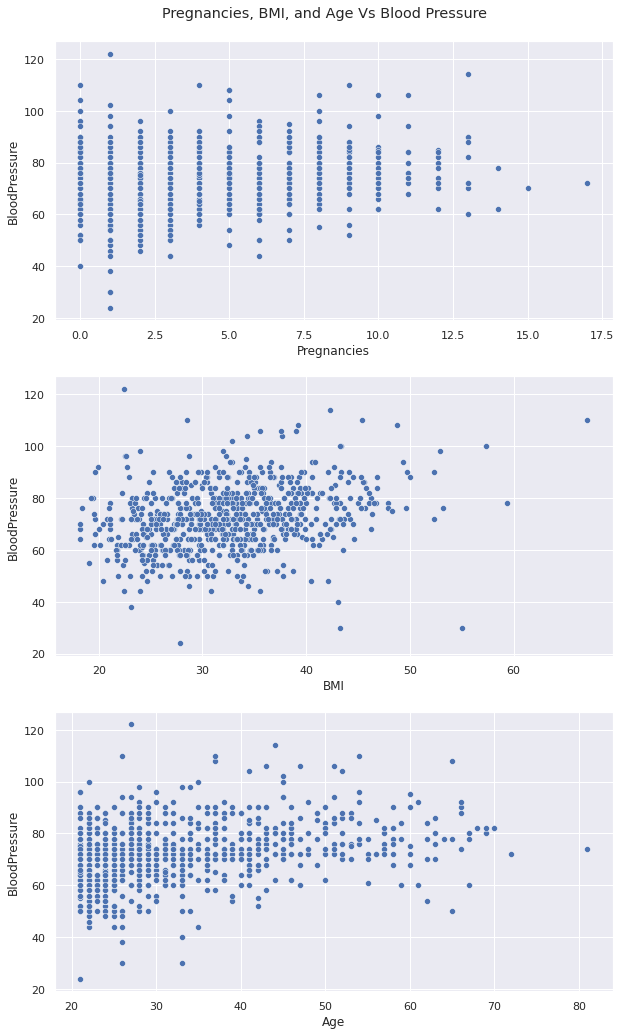

In [74]:
# simple linear regression
# plotting
fig, axs = plt.subplots(3, figsize=(10, 16))
sns.scatterplot(data=diabetes, x='Pregnancies', y='BloodPressure', ax=axs[0])
sns.scatterplot(data=diabetes, x='BMI', y='BloodPressure', ax=axs[1])
sns.scatterplot(data=diabetes, x='Age', y='BloodPressure', ax=axs[2])
fig.subplots_adjust(top=0.95)
fig.suptitle('Pregnancies, BMI, and Age Vs Blood Pressure')
plt.show()

In [75]:
# Multiple linear regression
X = diabetes[['Pregnancies', 'BMI', 'Age']]
y = diabetes['BloodPressure']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [78]:
print(regressor.intercept_)

46.30053406936468


In [79]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Pregnancies     0.099794
BMI             0.484302
Age             0.301784

In [80]:
print(f'r_sqr value: {regressor.score(X_train, y_train)}')

r_sqr value: 0.1816189259401192


In [81]:
y_pred = regressor.predict(X_test)

In [82]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
661    76.0  73.816127
122    74.0  69.713697
113    62.0  70.710573
14     72.0  74.685472
529    65.0  67.569662
..      ...        ...
476    80.0  71.572830
482    58.0  68.613253
230    86.0  74.648241
527    74.0  66.579870
380    72.0  68.559641

[154 rows x 2 columns]

In [83]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.545987696719914
MSE: 126.72153521367449
RMSE: 11.257066012672862


In [84]:
pip install dfply

  Using cached dfply-0.3.3-py3-none-any.whl (612 kB)
Note: you may need to restart the kernel to use updated packages.


In [85]:
# 1 way ANCOVA (BMI on Blood Pressure controlling for Age)
from dfply import *

In [86]:
# summary statistics for dependent variable Blood Pressure by BMI Group
diabetes >> group_by(X.BMIGp) >> summarize(n=X['BloodPressure'].count(), mean=X['BloodPressure'].mean(), std=X['BloodPressure'].std())

BMIGp    n       mean        std
0    Underweight    4  69.500000   5.000000
1  Normal weight  102  68.117647  12.814977
2     Overweight  179  69.536313  11.168906
3          Obese  483  74.368530  11.888521

In [87]:
# summary statistics for covariate Age by BMI Group
diabetes >> group_by(X.BMIGp) >> summarize(n=X['Age'].count(), mean=X['Age'].mean(), std=X['Age'].std())

BMIGp    n       mean        std
0    Underweight    4  24.000000   3.464102
1  Normal weight  102  31.892157  13.280602
2     Overweight  179  32.882682  12.783974
3          Obese  483  33.734990  11.013956

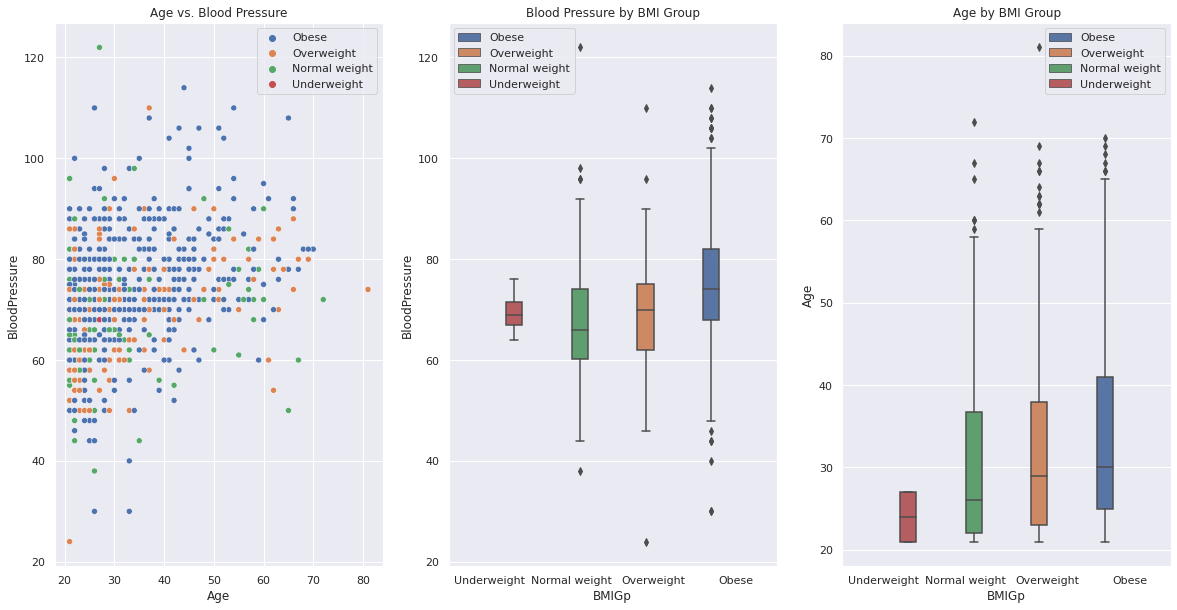

In [88]:
# visualization of BMI on Blood Pressure Controlling for Age
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))
sns.scatterplot(data=diabetes, x="Age", y="BloodPressure", hue=diabetes.BMIGp.tolist(), ax=axs[0]).set(title='Age vs. Blood Pressure')
sns.boxplot(data=diabetes, x="BMIGp", y="BloodPressure", hue=diabetes.BMIGp.tolist(), ax=axs[1]).set(title='Blood Pressure by BMI Group')
sns.boxplot(data=diabetes, x="BMIGp", y="Age", hue=diabetes.BMIGp.tolist(), ax=axs[2]).set(title='Age by BMI Group')
plt.show()

In [89]:
# 1-way ANCOVA (BMI on Blood Pressure controlling for Age)
from pingouin import ancova
ancova(data=diabetes, dv='BloodPressure', covar='Age', between='BMIGp', effsize='n2')

Source            SS   DF          F         p-unc        n2
0     BMIGp   4428.107612    3  11.736609  1.596503e-07  0.039743
1       Age  11033.026878    1  87.728437  8.258851e-20  0.099023
2  Residual  95957.476980  763        NaN           NaN       NaN

In [90]:
# post hoc test
res=stat()
res.tukey_hsd(df=diabetes,res_var='BloodPressure', xfac_var='BMIGp', anova_model='BloodPressure~ C(SkinThickness) + C(BMIGp)', ss_typ = 3)
result = res.tukey_summary
result

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1         group2      Diff      Lower      Upper   q-value  \
0          Obese     Overweight  4.832217   2.210660   7.453774  6.712737   
1          Obese  Normal weight  6.250883   2.986247   9.515519  6.972992   
2          Obese    Underweight  4.868530 -10.172977  19.910037  1.178743   
3     Overweight  Normal weight  1.418666  -2.298030   5.135361  1.390067   
4     Overweight    Underweight  0.036313 -15.109740  15.182366  0.008731   
5  Normal weight    Underweight  1.382353 -13.888148  16.652854  0.329669   

    p-value  
0  0.001000  
1  0.001000  
2  0.817432  
3  0.733615  
4  0.900000  
5  0.900000

In [91]:
model = ols('BloodPressure~Age+BMIGp', data=diabetes).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     32.36
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           6.18e-25
Time:                        13:19:50   Log-Likelihood:                -2943.6
No. Observations:                 768   AIC:                             5897.
Df Residuals:                     763   BIC:                             5921.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 61

In [92]:
res=stat()
res.anova_stat(df=diabetes, res_var='BloodPressure', anova_model='BloodPressure~Age+BMIGp')
res.anova_summary

df        sum_sq       mean_sq          F        PR(>F)
BMIGp       3.0   4428.107612   1476.035871  11.736609  1.596503e-07
Age         1.0  11033.026878  11033.026878  87.728437  8.258851e-20
Residual  763.0  95957.476980    125.763404        NaN           NaN

In [93]:
# post hoc test
res=stat()
res.tukey_hsd(df=diabetes,res_var='BloodPressure', xfac_var='BMIGp', anova_model='BloodPressure~ C(Age) + C(BMIGp)', ss_typ = 3)
result = res.tukey_summary
result

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1         group2      Diff      Lower      Upper   q-value  \
0          Obese     Overweight  4.832217   2.322496   7.341939  7.011910   
1          Obese  Normal weight  6.250883   3.125517   9.376249  7.283765   
2          Obese    Underweight  4.868530  -9.531306  19.268366  1.231277   
3     Overweight  Normal weight  1.418666  -2.139475   4.976807  1.452019   
4     Overweight    Underweight  0.036313 -14.463609  14.536234  0.009120   
5  Normal weight    Underweight  1.382353 -13.236708  16.001414  0.344362   

    p-value  
0  0.001000  
1  0.001000  
2  0.796593  
3  0.709043  
4  0.900000  
5  0.900000

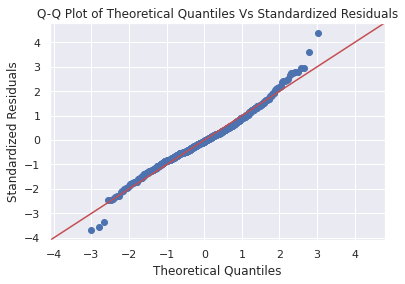

In [94]:
# test assumption of normality
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('Q-Q Plot of Theoretical Quantiles Vs Standardized Residuals')
plt.show()

In [95]:
# test for homogeneity of variances
res = stat()
res.bartlett(df=diabetes, res_var='BloodPressure', xfac_var='BMIGp')
res.bartlett_summary

Parameter   Value
0      Test statistics (T)  5.0283
1  Degrees of freedom (Df)  3.0000
2                  p value  0.1697

Text(0.5, 1.0, 'Age vs. Blood Pressure')

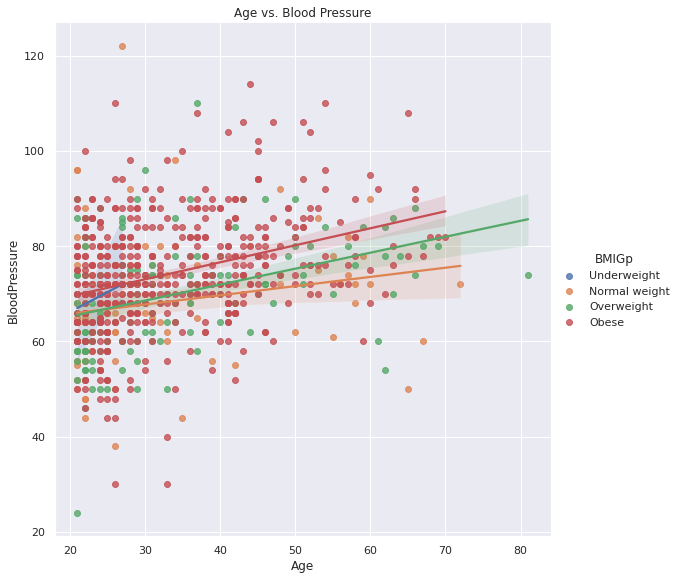

In [96]:
# test for homogeneity of regression slopes
sns.lmplot(data=diabetes, x="Age", y="BloodPressure", hue='BMIGp', height=8)
plt.title('Age vs. Blood Pressure')

In [97]:
# statistical power analysis
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import FTestAnovaPower
from scipy.stats import ttest_ind
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *

In [98]:
# calculating the power of BMI and BP (controlling for age)
from pingouin import power_anova
print ('Power is: %.6f' % power_anova(eta=0.039743, k=4, n=4, alpha=0.05))

Power is: 0.080431


In [99]:
# calculating the power of BMI and BP (controlling for age)
from pingouin import power_anova
print ('Power is: %.6f' % power_anova(eta=0.039743, k=4, n=192, alpha=0.05))

Power is: 0.998959


In [100]:
# ideal sample size for BMI and BP (controlling for age)
from pingouin import power_anova
print('n: %.6f' % power_anova(eta=0.039743, k=4, power=0.8, alpha=0.05))

n: 66.840753


In [101]:
# summary statistics for BP by glucose
diabetes >> group_by(X.GlucoseGp) >> summarize(n=X['BloodPressure'].count(), mean=X['BloodPressure'].mean(), std=X['BloodPressure'].std())

GlucoseGp    n       mean        std
0    Normal  576  71.112847  12.043520
1  Abnormal  192  76.208333  11.462131

In [102]:
# power of glucose group variable
effect_size = 0.428149
alpha = 0.05

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, nobs1 = 576,
                                        power = None, ratio = 0.3333,
                                        alpha = alpha)
print('Power is: {0:.6f}'.format(power))

Power is: 0.999241


In [103]:
# minimum sample size of glucose group variable
effect_size = 0.428149
alpha = 0.05

n_analysis = TTestIndPower()
n = n_analysis.solve_power(effect_size = effect_size,
                                        power =0.8,
                                        alpha = alpha)
print('Sample size is: {0:.6f}'.format(n))

Sample size is: 86.605008


In [104]:
# summary statistics for BP by diabetes
diabetes >> group_by(X.DiabetesGp) >> summarize(n=X['BloodPressure'].count(), mean=X['BloodPressure'].mean(), std=X['BloodPressure'].std())

DiabetesGp    n       mean        std
0          0  500  70.920000  11.929385
1          1  268  75.123134  11.951672

In [105]:
# power of diabetes group variable
effect_size = 0.352105
alpha = 0.05

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, nobs1 = 500,
                                        power = None, ratio = 0.536,
                                        alpha = alpha)
print('Power is: {0:.6f}'.format(power))

Power is: 0.996375


In [106]:
# minimum sample size of diabetes group variable
effect_size = 0.352105
alpha = 0.05

n_analysis = TTestIndPower()
n = n_analysis.solve_power(effect_size = effect_size,
                                        power =0.8,
                                        alpha = alpha)
print('Sample size is: {0:.6f}'.format(n))

Sample size is: 127.584561


In [107]:
# power of overweight vs obese (Cohen's D: 0.408339)
effect_size = 0.4
alpha = 0.05

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, nobs1 = 179,
                                        power = None, ratio = 2.6983,
                                        alpha = alpha)
print('Power is: {0:.6f}'.format(power))

Power is: 0.995401


In [108]:
# power of normal vs obese (Cohen's D: 0.528221)
effect_size = 0.5
alpha = 0.05

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, nobs1 = 102,
                                        power = None, ratio = 4.7353,
                                        alpha = alpha)
print('Power is: {0:.6f}'.format(power))

Power is: 0.995615


In [109]:
# power of obese vs underweight (Cohen's D: 0.411407)
effect_size = 0.5
alpha = 0.05

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, nobs1 = 483,
                                        power = None, ratio = 0.00828157,
                                        alpha = alpha)
print('Power is: {0:.6f}'.format(power))

Power is: 0.168578


In [110]:
# normal weight vs overweight (Cohen's D: 0.119882)
effect_size = 0.2
alpha = 0.05

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, nobs1 = 102,
                                        power = None, ratio = 1.7549,
                                        alpha = alpha)
print('Power is: {0:.6f}'.format(power))

Power is: 0.362086


In [111]:
# overweight vs underweight (Cohen's D: 0.003069)
effect_size = 0.1
alpha = 0.05

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, nobs1 = 179,
                                        power = None, ratio = 0.02234637,
                                        alpha = alpha)
print('Power is: {0:.6f}'.format(power))

Power is: 0.054446


In [112]:
# normal vs underweight (Cohen's D: 0.116813)
effect_size = 0.2
alpha = 0.05

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, nobs1 = 102,
                                        power = None, ratio = 0.03921569,
                                        alpha = alpha)
print('Power is: {0:.6f}'.format(power))

Power is: 0.067487


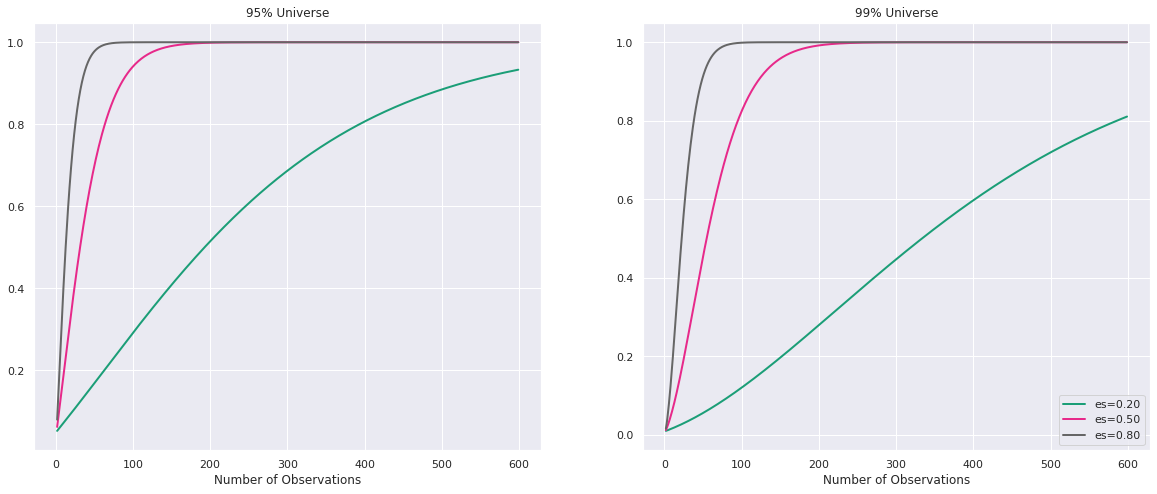

In [113]:
fig = plt.figure(figsize=(20, 2.5))
ax = fig.add_subplot(1,2,1)
fig = TTestIndPower().plot_power(dep_var = 'nobs',
                                nobs = np.arange(2,600),
                                effect_size = np.array([0.2, 0.5,0.8]),
                                alpha=0.05,
                                ax=ax, title="95% Universe")
ax.get_legend().remove()
ax = fig.add_subplot(1,2,2)
fig = TTestIndPower().plot_power(dep_var = 'nobs',
                                nobs = np.arange(2, 600),
                                effect_size = np.array([0.2, 0.5, 0.8]),
                                alpha=0.01,
                                ax=ax, title="99% Universe")
fig.subplots_adjust(top = 2.5)